In [80]:
# This example follows the tensorflow.org/tutorials with some modifications and extra comments or functions by me
# Basic classification: Classify images of clothing
# https://www.tensorflow.org/tutorials/keras/classification

In [3]:
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


### Import the Fashion MNIST dataset

In [30]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
# save the class names. This is the names corresponding to the labels 0-9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration

In [13]:
train_images.shape

(60000, 28, 28)

In [31]:
test_images.shape

(10000, 28, 28)

In [15]:
len(train_labels)

60000

In [17]:
len(test_labels)

10000

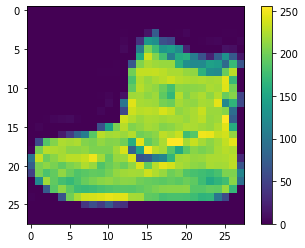

In [19]:
## Data preprocessing
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
# scale the iamge values to a range of 0 to 1 before feeding them to the neural network model. This is achieved by dividing 
# the values by 255. This transformation is done to the the training and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

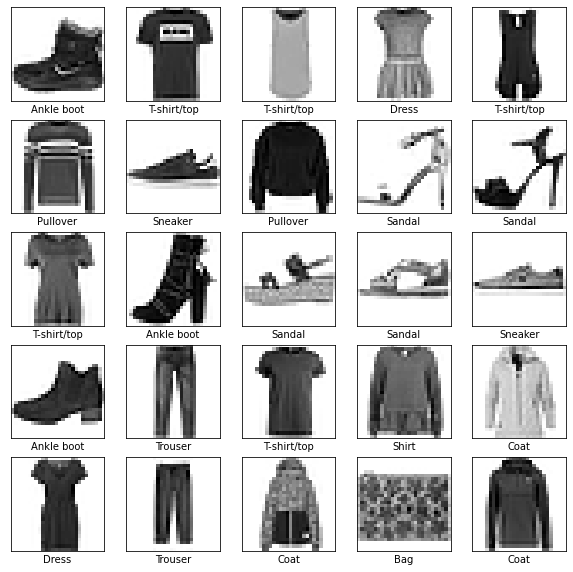

In [21]:
# Display the data to very correct transformation. Here the first 25 images are displayed 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # removes the ticks
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [24]:
# Building the model requires configuring the layers of the model, and then compiling the model

# Set up the layers
# Deep learning consists of chaining together simple layers. 
# layer keras.layers.Flatten transforms the 2D array data (28x28) to 1d array of (784 pixels)
#          This layer has no parameters to learn because its only a reformatting of the original data
# Next are sequence of two tf.keras.layers.Dense layers. The layers are densely connected, or fully connected neural layers
# Layer 1: The first Dense layer has 128 nodes (or neurons)
# Layer 2: This layer returns a logits array with length of 10. Each node contains a score that indicates the current image
# belongs to one of the 10 classes (0 to 9)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # this layer transforms the data from a 2D (28x28) to 1d array (784 pixesl)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compile the model

In [25]:
# Before the model is ready for training, it needs to be compiled. This compilation adds a few more setting parameters required
# for the model to run. The setting parameters are:
# Loss function - This measures how accurate the model is during the trainig. You want to minimize this function
# Optimizer - This is how the model is updated based on the data it sees and its loss function
# Metrics - Used to monitor the training and testing steps. This example uses accuracy - the fraction of images that are 
# correctly classified

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Train the model

In [26]:
# Training the neural network model requires the following steps:
# 1. Feed the training data to the model. In our example, the training data is in the train_images and train_labels arrays
# 2. The model learns to associates images and labels
# 3. You ask th emodel to make predictions about a test set - in this example, the test_images array
# 4. Verify that the predictions match the labels from the test_labesl array

# Feed the model
# Training is started by calling the method model.fit 

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.4953 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.3764 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.3358 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 1s 736us/step - loss: 0.3133 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.2964 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.2805 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.2675 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.2568 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 2s 815us/step - loss: 0.2474 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 1s 783u

In [ ]:
# The model accuracy on the training data set is 0.911 or 91.1%

### Evaluate the accuracy of the trained model

In [33]:
# To do this, we use the test_images and test_labels arrays
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3338 - accuracy: 0.8824


In [ ]:
# The accuracy on the test data set is less than  on the training data. The gap between both accuracies is called "overfitting"
# Overfitting occurs when an ML model performs worse on new previously unseed inputs than it does on training data
# An overfitted model memories the nose and details in the training dataset to a point where it negatively impacts the
# performance of the model on the new data


### Making predictions using the model

In [34]:
# We can not use the trained model to make predictions about some images. 
# The models linear outputs logits
# A softmax layer is attached to convert the logits to probabilities which are easier to interpret
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [35]:
predictions[0]

array([1.9611870e-09, 1.0065887e-09, 2.8921698e-11, 1.6134029e-10,
       1.2861238e-09, 1.4124614e-03, 4.7202460e-09, 2.2679005e-02,
       6.9544570e-09, 9.7590852e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [55]:
# map the output to the correct image class_names
def image_map(id):
    plt.xticks([]) # removes the ticks
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[id], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[id]])
    plt.show()
    print(class_names[np.argmax(predictions[id])])

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# I added this function to wrap of predictions
def verify(id):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(id,predictions[id], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(id,predictions[id],test_labels)
    plt.show()

### Verify predictions

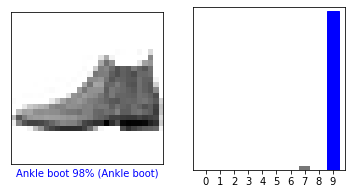

In [65]:
verify(0)

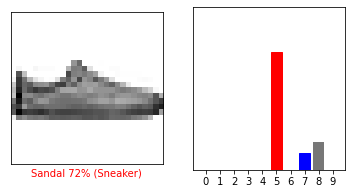

In [67]:
verify(12)

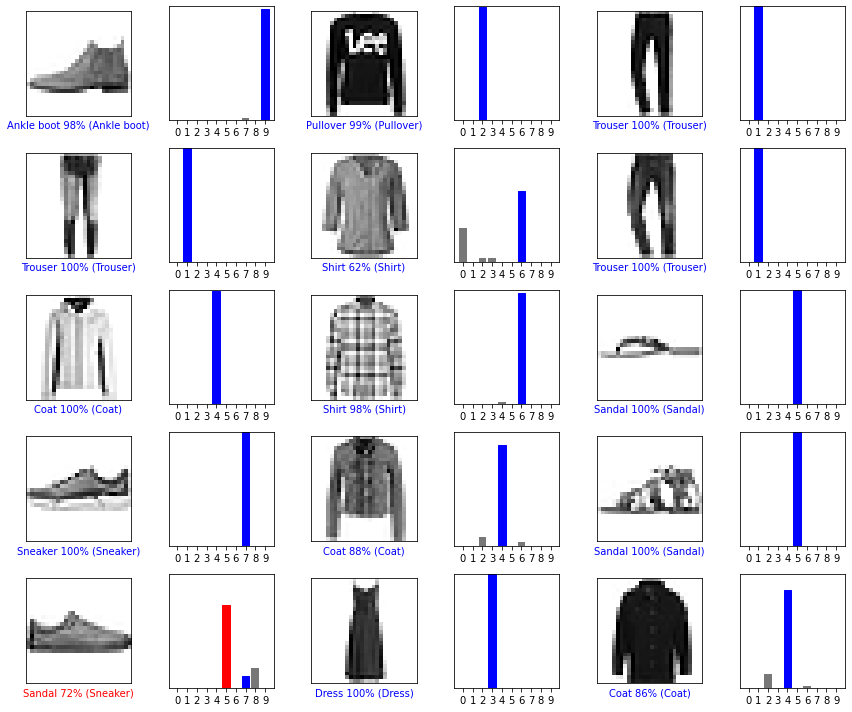

In [68]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Using the trained model

In [74]:
# Use the trained model for prediction
img = test_images[1]
print(img.shape)

(28, 28)


In [75]:
# Add the image to a batch, i.e., to a list
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [77]:
# predict the correct label for this image
predictions_single=probability_model.predict(img)
print(predictions_single)

[[1.4751872e-04 2.2854102e-11 9.9463731e-01 1.2797686e-07 3.4916000e-03
  2.3399677e-08 1.7231357e-03 9.7987880e-15 2.3189489e-07 2.8111977e-12]]


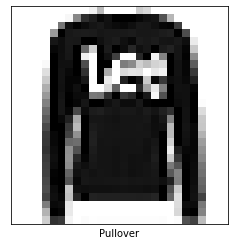

Pullover


In [79]:
image_map(1)

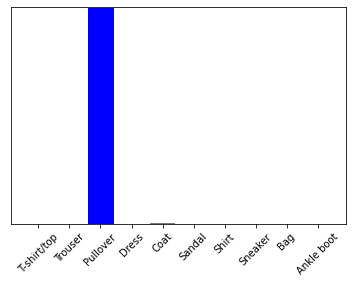

In [78]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names, rotation=45)